<a href="https://colab.research.google.com/github/forouzanfallah/Fault-Tolerant-Control-Systems-TA-Class-Material/blob/main/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import itertools
import pickle
import scipy.io
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



#DataSet

In [80]:
!git clone https://github.com/forouzanfallah/Fault-Tolerant-Control-Systems-TA-Class-Material.git

fatal: destination path 'Fault-Tolerant-Control-Systems-TA-Class-Material' already exists and is not an empty directory.


In [81]:
data_train_fault = pd.read_excel("/content/Fault-Tolerant-Control-Systems-TA-Class-Material/dataset/Fault 1-20  train (20x960x52).xlsx",header=None,  names=['','','','','xmeas_1', 'xmeas_2', 'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6',
       'xmeas_7', 'xmeas_8', 'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12',
       'xmeas_13', 'xmeas_14', 'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18',
       'xmeas_19', 'xmeas_20', 'xmeas_21', 'xmeas_22', 'xmeas_23', 'xmeas_24',
       'xmeas_25', 'xmeas_26', 'xmeas_27', 'xmeas_28', 'xmeas_29', 'xmeas_30',
       'xmeas_31', 'xmeas_32', 'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36',
       'xmeas_37', 'xmeas_38', 'xmeas_39', 'xmeas_40', 'xmeas_41', 'xmv_1',
       'xmv_2', 'xmv_3', 'xmv_4', 'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9',
       'xmv_10', 'xmv_11'])
data_test_fault = pd.read_excel("/content/Fault-Tolerant-Control-Systems-TA-Class-Material/dataset/Fault 1-20  test  (20x960x52).xlsx")
data_train_normal = pd.read_excel("/content/Fault-Tolerant-Control-Systems-TA-Class-Material/dataset/Normal 00 train (480x52).xlsx")
data_test_normal = pd.read_excel("/content/Fault-Tolerant-Control-Systems-TA-Class-Material/dataset/Normal 00 test (960x52).xlsx")

In [82]:
X_train_fault = data_train_fault.iloc[:,4:]
X_test_fault = data_test_fault.iloc[:,4:]

y_train_fault = data_train_fault.iloc[:,1]
y_test_fault = data_test_fault.iloc[:,1]

X_train_normal = data_train_normal.iloc[:,4:]
X_test_normal = data_test_normal.iloc[:,4:]

y_train_normal = data_train_normal.iloc[:,1]
y_test_normal = data_test_normal.iloc[:,1]

In [83]:
data_train = [X_train_fault, X_train_normal]
label_train = [y_train_fault, y_train_normal]
X_train = pd.concat(data_train)
y_train = pd.concat(label_train)

In [84]:
data_test = [X_test_fault, X_test_normal]
label_test = [y_test_fault, y_test_normal]
X_test = pd.concat(data_test)
y_test = pd.concat(label_test)

In [85]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [86]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Confusion Matrix


In [87]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#KNN

In [88]:
classifier_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [89]:
y_pred_KNN = classifier_KNN.predict(X_test)

In [90]:
cm_KNN = confusion_matrix(y_test, y_pred_KNN)
print(cm_KNN)

[[535  15  13 113  12  23   7   2   7  48   7   3   1   2   0  12  45  16
    0  41  58]
 [ 90 793   4  20   2   3   2   1   0   7   1   1   0   1   0   2  10   3
    0  12   8]
 [ 95   4 787  22   2   3   2   1   0  10   0   1   0   1   0   2  11   3
    0  11   5]
 [526  15  20 116  16  25   4   2   6  47   8   3   0   2   0  14  43  14
    0  42  57]
 [442  14  14 137 149  16   4   3   2  16   6   4   1   1   0   7  37  14
    0  41  52]
 [452  13  11  75  11 137   5   2  14  34  29   3  19   3   0  13  42  11
    0  40  46]
 [ 88   4   4  21   2   4 795   1   0   7   0   1   0   1   0   2  10   3
    0  11   6]
 [101   4   4  20   2   3   2 782   0   7   0   1   0   1   0   2  10   4
    0  11   6]
 [156 103   5  35   4 101   2  51 173   9  33   2 148  53   0   4  25   6
    7  16  27]
 [541  16  14 115  16  25   4   1   4  43  10   3   0   1   1   8  52  16
    0  36  54]
 [500  13  14  96   9  49   5   3   6  35  36   2   2   2   0  16  59  16
    0  38  59]
 [432  16  11 112  38

Confusion matrix, without normalization


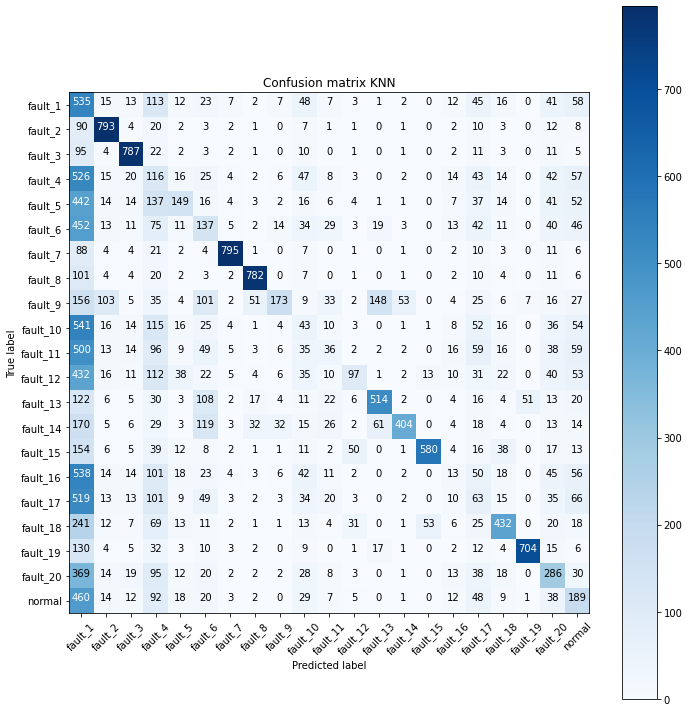

In [91]:
f = plt.figure(figsize=(10,10))
plot_confusion_matrix(cm_KNN, ['fault_1', 'fault_2', 'fault_3', 'fault_4', 'fault_5', 'fault_6',
       'fault_7', 'fault_8', 'fault_9', 'fault_10', 'fault_11', 'fault_12',
       'fault_13', 'fault_14', 'fault_15', 'fault_16', 'fault_17', 'fault_18',
       'fault_19', 'fault_20', 'normal'],
                          normalize=False,
                          title='Confusion matrix KNN',
                          cmap=plt.cm.Blues)

In [92]:
f.savefig('classifier_KNN.pdf')

In [93]:
filename = 'classifier_KNN.sav'
pickle.dump(classifier_KNN,open(filename,'wb'))


##KNN Parameters

### *n_neighbors*

default=5

Number of neighbors to use by default for kneighbors queries.

### *weights*

{‘uniform’, ‘distance’} 

default=’uniform’

Weight function used in prediction. Possible values:

‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.

‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away

### *algorithm*

{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}

default=’auto’

Algorithm used to compute the nearest neighbors:

‘ball_tree’ will use BallTree

‘kd_tree’ will use KDTree

‘brute’ will use a brute-force search.

‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.

### *p*

default=2

Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

#SVM

##linear

In [94]:
classifier_SVM = SVC(kernel = 'linear', random_state = 0,verbose=1)
classifier_SVM.fit(X_train, y_train)

[LibSVM]

SVC(kernel='linear', random_state=0, verbose=1)

In [95]:
y_pred_SVM = classifier_SVM.predict(X_test)

In [96]:
cm_SVM = confusion_matrix(y_test, y_pred_SVM)
print(cm_SVM)


[[ 48   0   0 265   0   0   0   0 138 171  12   0   1   1 156  91  11   0
    0  27  39]
 [  9 792   0  39   0   0   0   0  13  31  11   0   4   1  29  10   6   0
    0   5  10]
 [  9   0 787  45   0   0   0   0  15  30  11   0   0   1  29  12   6   0
    0   5  10]
 [ 48   0   0 349   0   0   0   0 128 131  12   0   1   1 156  65  10   1
    0  16  42]
 [  9   0   0  38 800   0   0   0  11  30  11   0   0   1  29  10   6   0
    0   5  10]
 [ 12   0   0  42   0 793   0   0  11  30  11   0   0   1  29  10   6   0
    0   5  10]
 [  9   0   0  38   0   0 800   0  11  30  11   0   0   1  29  10   6   0
    0   5  10]
 [  9   0   0  38   0   0   0 800  11  30  11   0   0   1  29  10   6   0
    0   5  10]
 [ 26 116   7  51   0   0   0   0 149  47  78   0 172  27 164  17  19   7
   20   5  55]
 [ 45   0   0 281   0   0   0   0 130 162  11   0   1   1 156  94  13   0
    0  23  43]
 [ 40   0   1 200   0   0   0   0 123 104  73   0   0   5 109  87  59   1
    0  79  79]
 [ 31   0   1 180 167

Confusion matrix, without normalization


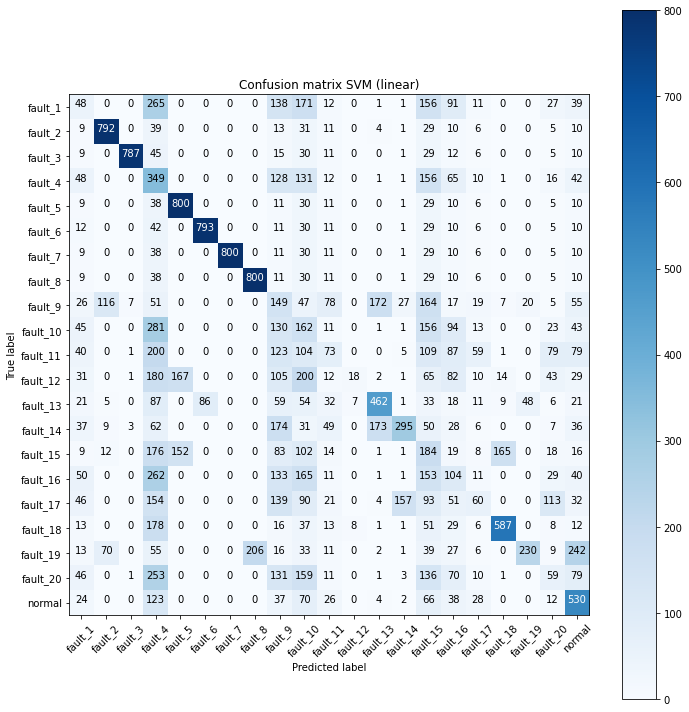

In [97]:
f = plt.figure(figsize=(10,10))
plot_confusion_matrix(cm_SVM, ['fault_1', 'fault_2', 'fault_3', 'fault_4', 'fault_5', 'fault_6',
       'fault_7', 'fault_8', 'fault_9', 'fault_10', 'fault_11', 'fault_12',
       'fault_13', 'fault_14', 'fault_15', 'fault_16', 'fault_17', 'fault_18',
       'fault_19', 'fault_20', 'normal'],
                          normalize=False,
                          title='Confusion matrix SVM (linear)',
                          cmap=plt.cm.Blues)

In [98]:
f.savefig('classifier_SVM.pdf')

In [100]:
filename = 'classifier_SVM.sav'
pickle.dump(classifier_SVM,open(filename,'wb'))

##rbf

In [101]:
classifier_kSVM_rbf = SVC(kernel = 'rbf', random_state = 0)
classifier_kSVM_rbf.fit(X_train, y_train)

SVC(random_state=0)

In [111]:
y_pred_kSVM_rbf = classifier_kSVM_rbf.predict(X_test)

In [112]:
cm_kSVM_rbf = confusion_matrix(y_test, y_pred_kSVM_rbf)
print(cm_kSVM_rbf)

[[  0   0   0 327   0   0   0   0   1 366   2  56   0   0   0 105  54   0
    0  33  16]
 [  0 790   0  50   0   0   0   0   0  73   1   5   0   0   0  11  17   0
    0   6   7]
 [  0   0 778  55   0   0   0   0  10  69   1   6   0   0   0  12  17   0
    0   7   5]
 [  0   0   0 381   0   0   0   0   1 311   2  59   0   0   0 103  53   0
    0  33  17]
 [  0   0   0  50 790   0   0   0   0  65   1   6   0   0   0  11  17   0
    0  13   7]
 [  0   0   0 171   0 461   0   0   5 185   1  19  22   0   0  42  23   0
    0  20  11]
 [  0   0   0  50   0   0 795   0   0  65   1   5   0   0   0  11  17   0
    5   6   5]
 [  0   0   0  50   0   0   0 800   0  65   1   5   0   0   0  11  17   0
    0   6   5]
 [  0  66   0  57   0  24   0   0 212  88  21  21 348  31   0  17  29   3
    9  15  19]
 [  0   0   0 341   0   0   0   0   1 348   2  57   0   0   0 107  58   0
    0  33  13]
 [  0   0   0 294   0   5   0   0   5 299  21  78   9   0   0 125  70   0
    0  33  21]
 [  0   0   0 191 160

Confusion matrix, without normalization


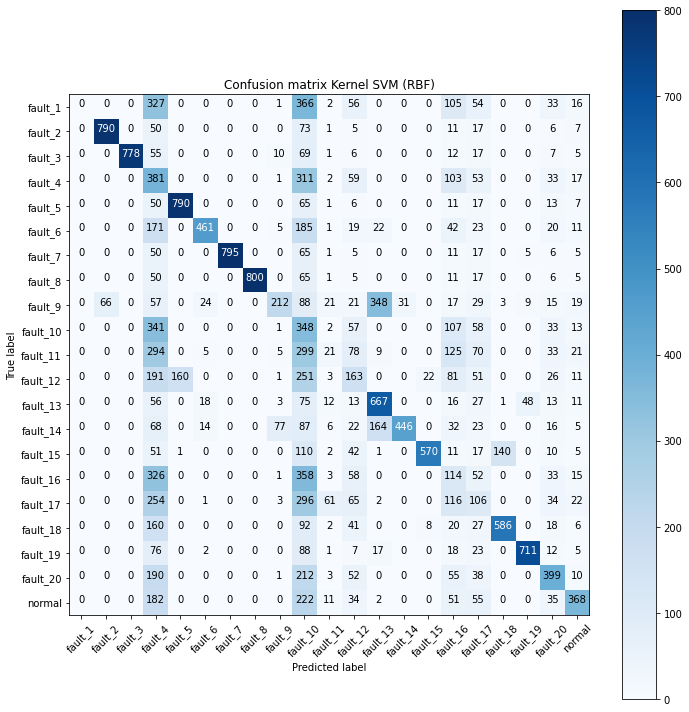

In [113]:
f = plt.figure(figsize=(10,10))
plot_confusion_matrix(cm_kSVM_rbf, ['fault_1', 'fault_2', 'fault_3', 'fault_4', 'fault_5', 'fault_6',
       'fault_7', 'fault_8', 'fault_9', 'fault_10', 'fault_11', 'fault_12',
       'fault_13', 'fault_14', 'fault_15', 'fault_16', 'fault_17', 'fault_18',
       'fault_19', 'fault_20', 'normal'],
                          normalize=False,
                          title='Confusion matrix Kernel SVM (RBF)',
                          cmap=plt.cm.Blues)

In [114]:
f.savefig('classifier_kSVM_rbf.pdf')

In [115]:
filename = 'classifier_kSVM_rbf.sav'
pickle.dump(classifier_kSVM_rbf,open(filename,'wb'))

##sigmoid

In [116]:
classifier_kSVM_sigmoid = SVC(kernel = 'sigmoid', random_state = 0)
classifier_kSVM_sigmoid.fit(X_train, y_train)

SVC(kernel='sigmoid', random_state=0)

In [117]:
y_pred_kSVM_sigmoid = classifier_kSVM_sigmoid.predict(X_test)

In [118]:
cm_kSVM_sigmoid = confusion_matrix(y_test, y_pred_kSVM_sigmoid)
print(cm_kSVM_sigmoid)

[[  0   0   0 144   0  21   0   0 140  68   0   0  28 278  45 106  49   0
    8  73   0]
 [  0 763   0  23   0   1   0   0  40   9  14   0  16  50   9   7  17   0
    2   9   0]
 [  0   0 774  29   0   1   0   0  27   8   0   0  18  53   9   7  17   0
    2  15   0]
 [  0   0   0 177   0  21   0   0 141  60   0   0  25 273  44  91  44   0
    7  77   0]
 [  0   0   0  23 549   1   0   0  88   7   0   4  19 221   9   7  17   0
    6   9   0]
 [  0   0   0  57   0 443   0   0  94   9  24   0  34 226  13  13  27   0
    8  12   0]
 [  0   0   0  23   0   1 712  80  24   7   0   0  16  53   9   7  17   0
    2   9   0]
 [  0   0   0  23   0   1   0 702  53   7   7   0  21  91   9   7  18   0
    9   9   3]
 [  0  75   0  28   0  14   0   0 164  30 144   0  86 223  63  21  63   1
   20  15  13]
 [  0   0   0 152   0  21   0   0 139  59   0   0  33 267  52 107  57   0
    4  69   0]
 [  0   0   0 149   0  25   0   0 132  44   0   0  50 280  33  96  70   0
   11  69   1]
 [  0   0   0 105 122

Confusion matrix, without normalization


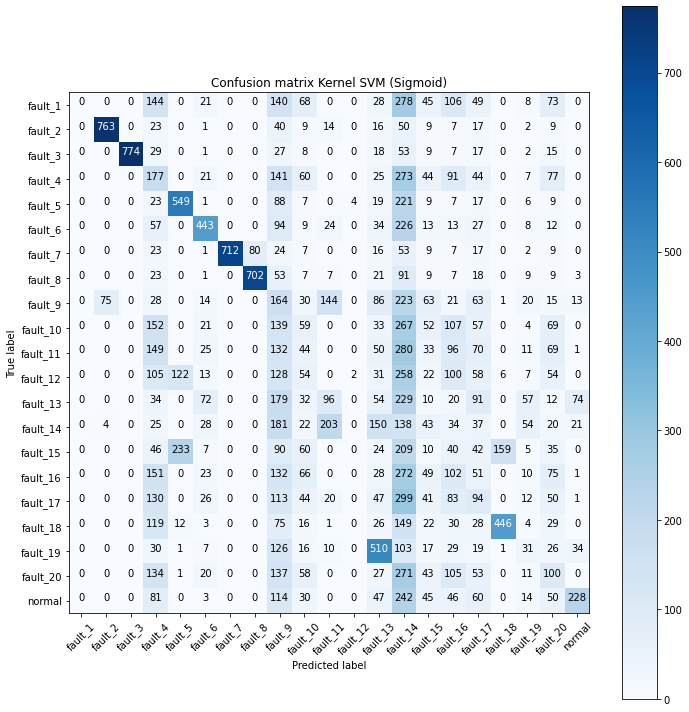

In [119]:
f = plt.figure(figsize=(10,10))
plot_confusion_matrix(cm_kSVM_sigmoid,  ['fault_1', 'fault_2', 'fault_3', 'fault_4', 'fault_5', 'fault_6',
       'fault_7', 'fault_8', 'fault_9', 'fault_10', 'fault_11', 'fault_12',
       'fault_13', 'fault_14', 'fault_15', 'fault_16', 'fault_17', 'fault_18',
       'fault_19', 'fault_20', 'normal'],
                          normalize=False,
                          title='Confusion matrix Kernel SVM (Sigmoid)',
                          cmap=plt.cm.Blues)

In [120]:
f.savefig('classifier_kSVM_sigmoid.pdf')

In [121]:
filename = 'classifier_kSVM_sigmoid.sav'
pickle.dump(classifier_kSVM_sigmoid,open(filename,'wb'))

##poly

In [ ]:
classifier_kSVM_poly = SVC(kernel = 'poly', degree=12, gamma = 10, random_state = 0)
classifier_kSVM_poly.fit(X_train, y_train)

In [ ]:
y_pred_kSVM_poly = classifier_kSVM_poly.predict(X_test)

In [ ]:
cm_kSVM_poly = confusion_matrix(y_test, y_pred_kSVM_poly)
print(cm_kSVM_poly)

Confusion matrix, without normalization


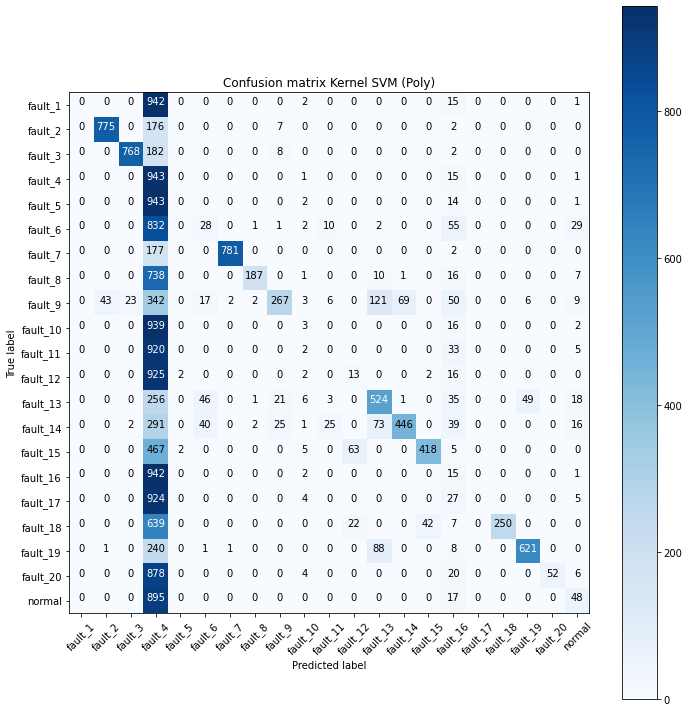

In [145]:
f = plt.figure(figsize=(10,10))
plot_confusion_matrix(cm_kSVM_poly,  ['fault_1', 'fault_2', 'fault_3', 'fault_4', 'fault_5', 'fault_6',
       'fault_7', 'fault_8', 'fault_9', 'fault_10', 'fault_11', 'fault_12',
       'fault_13', 'fault_14', 'fault_15', 'fault_16', 'fault_17', 'fault_18',
       'fault_19', 'fault_20', 'normal'],
                          normalize=False,
                          title='Confusion matrix Kernel SVM (Poly)',
                          cmap=plt.cm.Blues)

In [128]:
f.savefig('classifier_kSVM_poly.pdf')

In [129]:
filename = 'classifier_kSVM_poly.sav'
pickle.dump(classifier_kSVM_poly,open(filename,'wb'))

##SVM Parameters

gamma

gamma is a parameter for non linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set

C

C is the penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly.

degree

degree is a parameter used when kernel is set to ‘poly’. It’s basically the degree of the polynomial used to find the hyperplane to split the data.